# Missing data handlinig

In [2]:
# This piece of code blocks the warning messages
import warnings 
warnings.filterwarnings('ignore')
# Import libraries and check the versions
import pandas as pd
import sys
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas_profiling
%matplotlib inline

print('Python version ' + sys.version)
print('Numpy version ' + np.__version__)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__ )
print('Missingno version ' + msno.__version__)

Python version 3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:14:56) 
[GCC 7.2.0]
Numpy version 1.14.3
Pandas version 0.23.0
Matplotlib version 2.2.2
Missingno version 0.4.0


/home/ben/anaconda3/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/ben/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ben/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ben/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ben/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ben/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loo

In [3]:
data = {'name': ['Michael', 'Jessica', 'Sue', 'Jake', 'Amy', 'Tye'],
        'gender':[None,'F',np.NaN,'F',np.NaN, 'M'],
        'height': [123, 145, 100 , np.NaN, None, 150],
        'weight': [10, np.NaN , 30, np.NaN, None, 20],
        'age': [14, None, 29 , np.NaN, 52, 45],
        }
df = pd.DataFrame(data, columns = ['name','gender', 'height', 'weight', 'age'])
df

,name,gender,height,weight,age
0,Michael,None,123.0,10.0,14.0
1,Jessica,F,145.0,NaN,NaN
2,Sue,NaN,100.0,30.0,29.0
3,Jake,F,NaN,NaN,NaN
4,Amy,NaN,NaN,NaN,52.0
5,Tye,M,150.0,20.0,45.0


In [4]:
# create a numpy array that has a missing value
a = np.array([1,2,np.nan, 4])
a.dtype

dtype('float64')

In [5]:
# sum doesn't work how it is expected
np.sum(a)

nan

In [6]:
# use nansum for expected result
np.nansum(a)

7.0

In [7]:
# .info() is general information about a dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
name      6 non-null object
gender    3 non-null object
height    4 non-null float64
weight    3 non-null float64
age       4 non-null float64
dtypes: float64(3), object(2)
memory usage: 320.0+ bytes


In [8]:
# sum of the missing values in each column
df.isnull().sum()

name      0
gender    3
height    2
weight    3
age       2
dtype: int64

In [9]:
# notnull() is opppsite of isnull()
df.notnull().sum()

name      6
gender    3
height    4
weight    3
age       4
dtype: int64

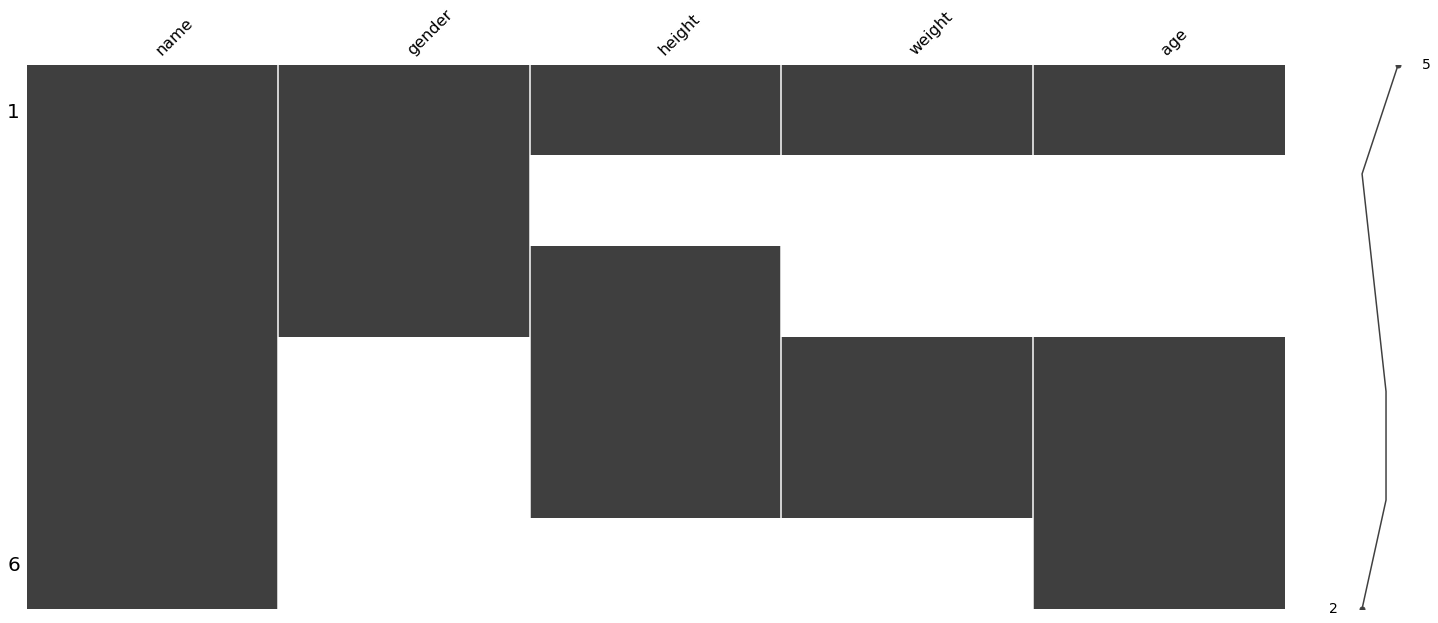

In [10]:
msno.matrix(df.sample(6))

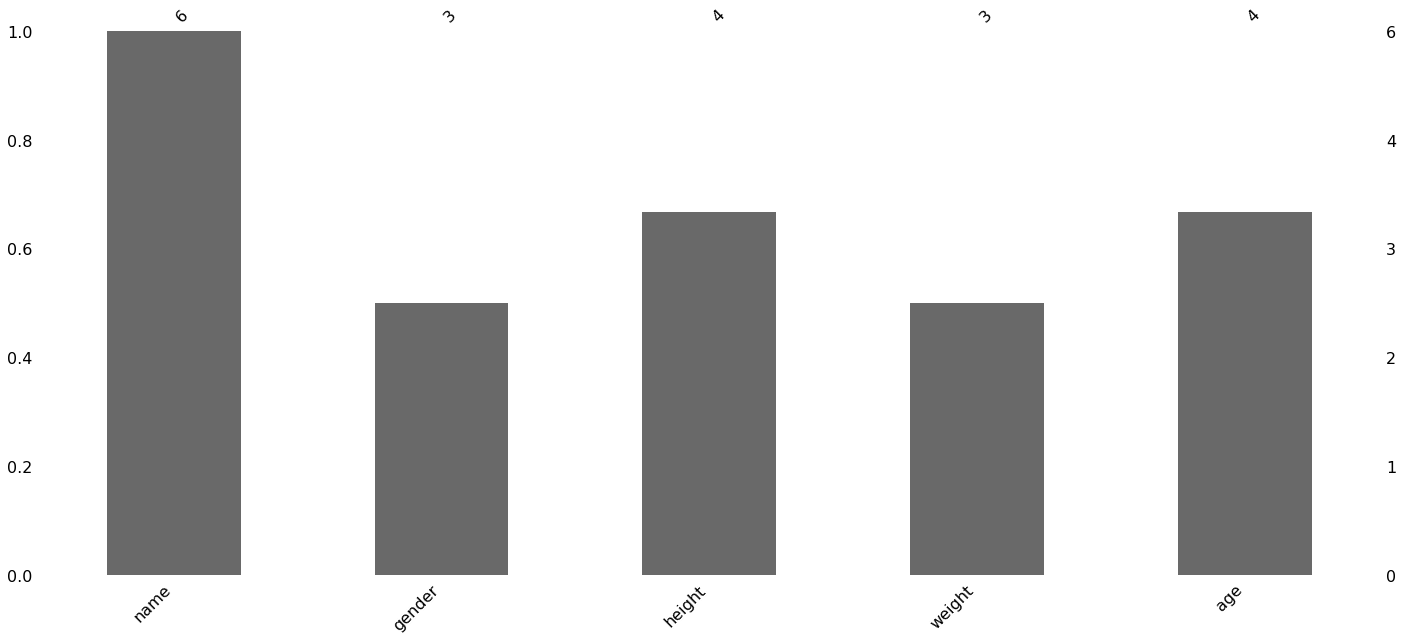

In [11]:
msno.bar(df.sample(6))

In [12]:
pandas_profiling.ProfileReport(df)

Number of variables,5
Number of observations,6
Total Missing (%),33.3%
Total size in memory,320.0 B
Average record size in memory,53.3 B
Numeric,3
Categorical,1
Boolean,0
Date,0
Text (Unique),1
Rejected,0


## How can we handle missing values?
The easiest way is to get rid of the rows/columns that have missing values. Pandas built-in function dropna() is for that. Pandas does not allow single cell deletion. Either the entire row or column has to be removed.

One thing to keep in my mind is that dropna() has a parameter called inplace=False which protects the dataset from changes. If inplace=True, then any changes will apply to the dataset right away.

In [13]:
# original dataset has not changed
df.dropna()

,name,gender,height,weight,age
5,Tye,M,150.0,20.0,45.0


In [14]:
# parameter axis=1 deletes the columns
df.dropna(axis = 1)

,name
0,Michael
1,Jessica
2,Sue
3,Jake
4,Amy
5,Tye


In [15]:
# fills all the missing values with the spcified value, inplace is False.
df['age'].fillna(0)

0    14.0
1     0.0
2    29.0
3     0.0
4    52.0
5    45.0
Name: age, dtype: float64

In [16]:
# inplace = False
df['gender'].fillna(method='ffill')

0    None
1       F
2       F
3       F
4       F
5       M
Name: gender, dtype: object

In [17]:
# inplace is True. Changes has applied to the dataset.
df['gender'].fillna(method='bfill', inplace=True)

In [18]:
df['height'].fillna(df.groupby('gender')['height'].transform('mean'), inplace=True)

In [19]:
df['weight'].fillna(df['weight'].median(), inplace=True)
# only age column has missing values
df.isnull().sum()

name      0
gender    0
height    0
weight    0
age       2
dtype: int64

In [20]:
df['age'].interpolate(inplace=True)

In [21]:
df

,name,gender,height,weight,age
0,Michael,F,123.000000,10.0,14.0
1,Jessica,F,145.000000,20.0,21.5
2,Sue,F,100.000000,30.0,29.0
3,Jake,F,122.666667,20.0,40.5
4,Amy,M,150.000000,20.0,52.0
5,Tye,M,150.000000,20.0,45.0


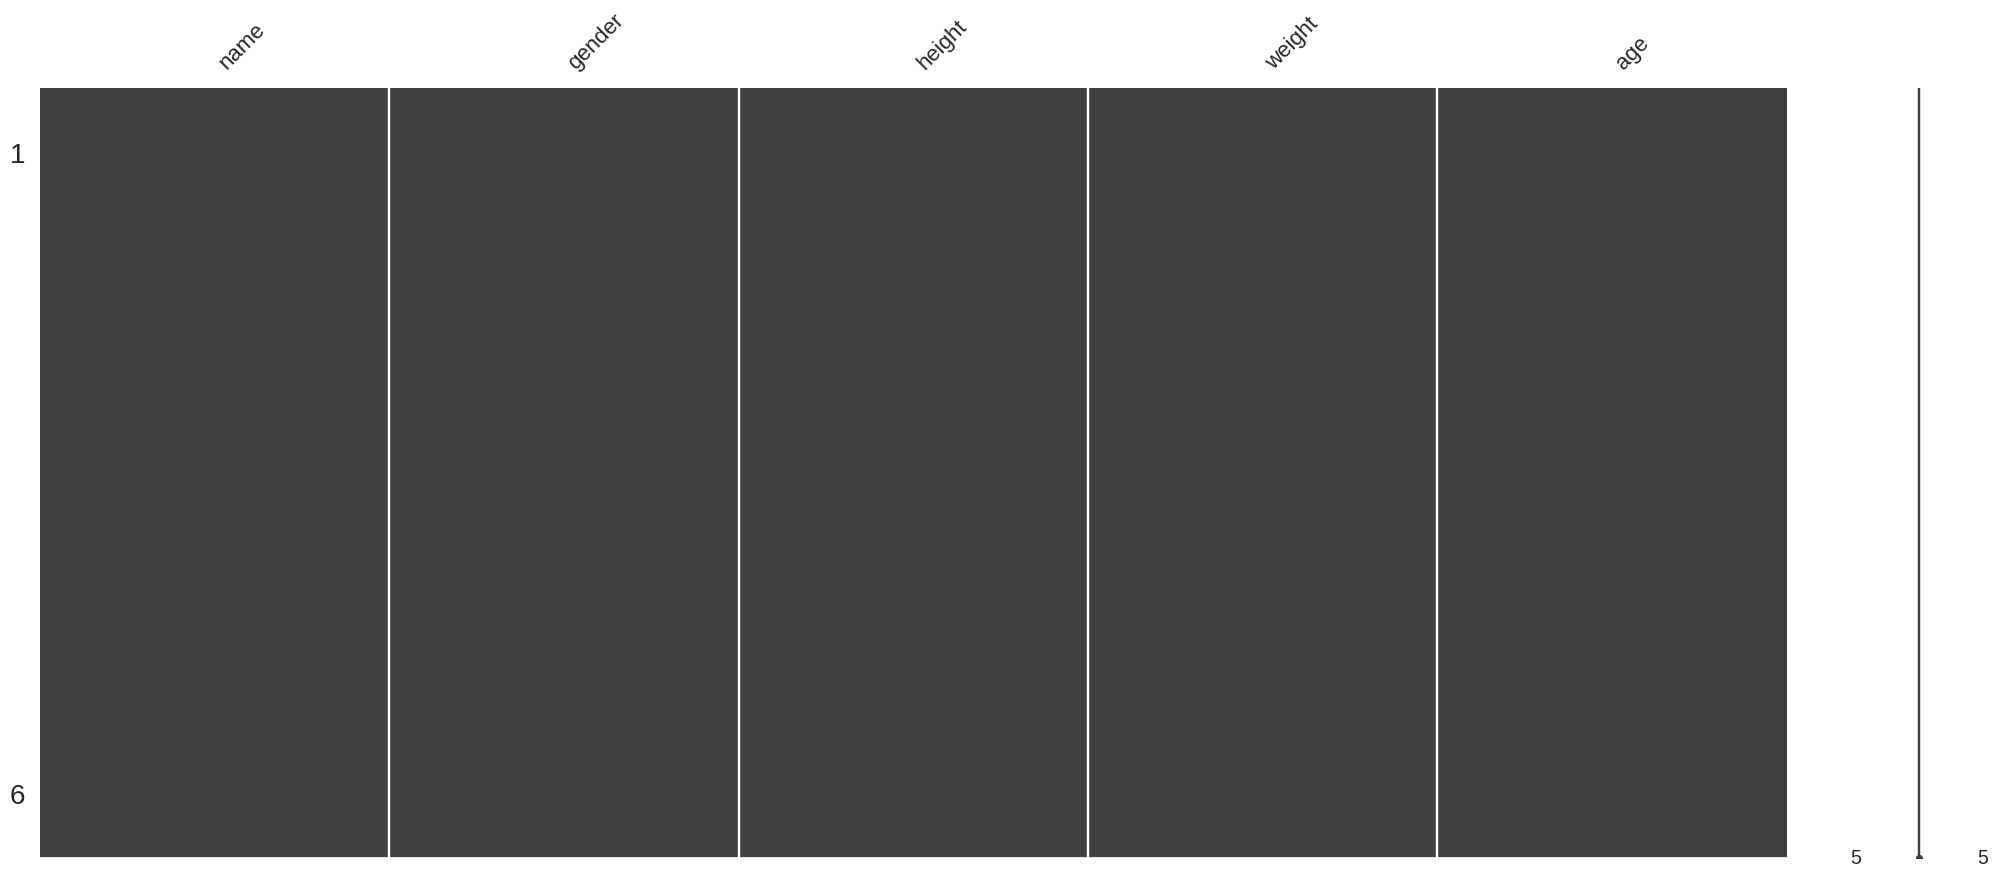

In [22]:
msno.matrix(df)

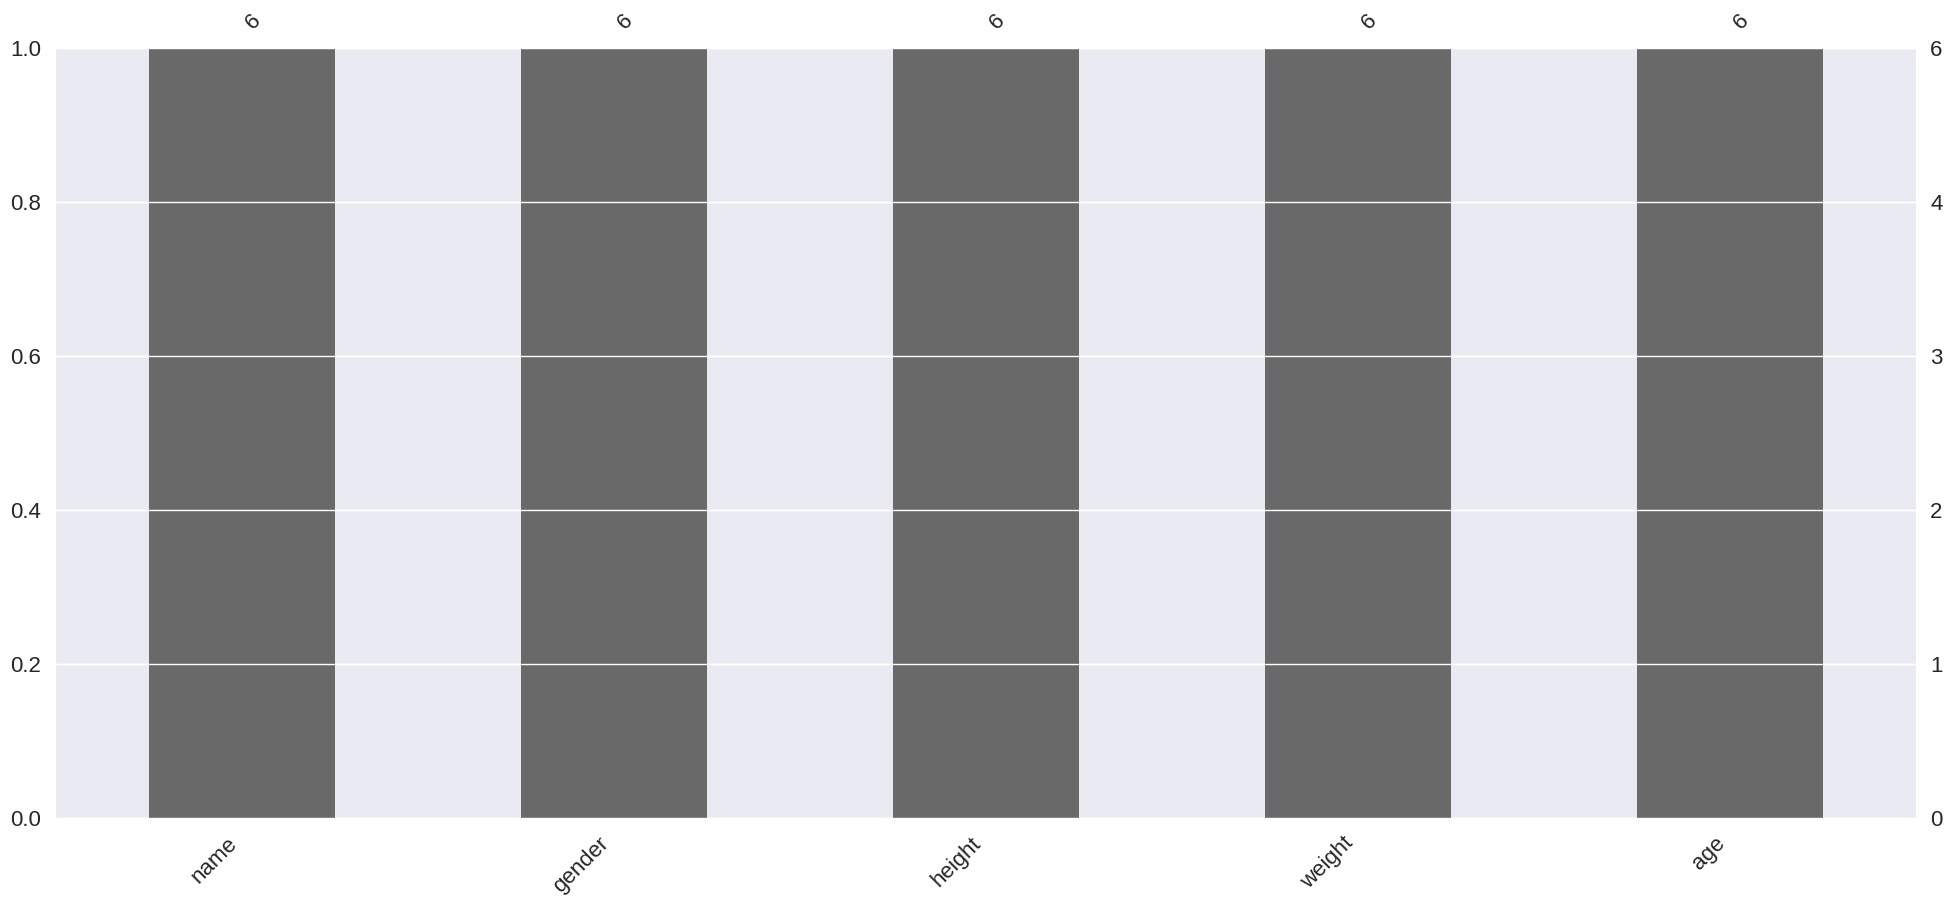

In [23]:
msno.bar(df)